## 6.2: Exploring Relationships

## 1.Importing libraries and importing the cleaned data set 

In [19]:
# importing libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import scipy

In [2]:
# Replace 'file_path' with the actual path to your Excel file
file_path = r'C:\Users\nikman\Desktop\CareerFoundry Project\Achievement 6\Tasks Achievement 6\Cleaned Data Set.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)


In [3]:
df.shape

(246022, 40)

In [4]:
df.head()

State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                   4                 0   
1  Alabama    Male     Very good                   0                 0   
2  Alabama    Male     Very good                   0                 0   
3  Alabama  Female          Fair                   5                 0   
4  Alabama  Female          Good                   3                15   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0           9            None of them             No  ...           1.60   
1           6            None of them             No  ...           1.78   
2           8  6 or more, but not all             No  ...           1.85   
3           9            None of them             No  ...           1.70   
4           5                  1 to 5             No  ...           1.55   

  WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
0             71.67  27.99              No         No          Yes   
1             95.25  30.13              No         No          Yes   
2            108.86  31.66             Yes         No           No   
3             90.72  31.32              No         No          Yes   
4             79.38  33.07              No         No          Yes   

  PneumoVaxEver                                  TetanusLast10Tdap  \
0           Yes                                 Yes, received Tdap   
1           Yes  Yes, received tetanus shot but not sure what type   
2           Yes  No, did not receive any tetanus shot in the pa...   
3           Yes  No, did not receive any tetanus shot in the pa...   
4           Yes  No, did not receive any tetanus shot in the pa...   

  HighRiskLastYear CovidPos  
0               No       No  
1               No       No  
2               No      Yes  
3               No      Yes  
4               No       No  

[5 rows x 40 columns]

## 2.Creating subset with numerical variables and keeping categorical variables out
### Creating subset of PhysicalHealthDays, MentalHealthDays, SleepHours, HeightInMeters, WeightInKilograms, BMI, 

In [5]:
df_sub = df[['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']]

In [6]:
df_sub

PhysicalHealthDays  MentalHealthDays  SleepHours  HeightInMeters  \
0                        4                 0           9            1.60   
1                        0                 0           6            1.78   
2                        0                 0           8            1.85   
3                        5                 0           9            1.70   
4                        3                15           5            1.55   
...                    ...               ...         ...             ...   
246017                   0                 0           6            1.78   
246018                   0                 7           7            1.93   
246019                   0                15           7            1.68   
246020                   2                 2           7            1.70   
246021                   0                 0           5            1.83   

        WeightInKilograms    BMI  
0                   71.67  27.99  
1                   95.25  30.13  
2                  108.86  31.66  
3                   90.72  31.32  
4                   79.38  33.07  
...                   ...    ...  
246017             102.06  32.28  
246018              90.72  24.34  
246019              83.91  29.86  
246020              83.01  28.66  
246021             108.86  32.55  

[246022 rows x 6 columns]

## 3.Creating Correlation Matrix

In [7]:
# Creating correlation matrix using pandas
df_sub.corr()

PhysicalHealthDays  MentalHealthDays  SleepHours  \
PhysicalHealthDays            1.000000          0.306800   -0.056063   
MentalHealthDays              0.306800          1.000000   -0.130100   
SleepHours                   -0.056063         -0.130100    1.000000   
HeightInMeters               -0.049180         -0.056010   -0.011384   
WeightInKilograms             0.077505          0.042441   -0.054691   
BMI                           0.116905          0.082182   -0.054750   

                    HeightInMeters  WeightInKilograms       BMI  
PhysicalHealthDays       -0.049180           0.077505  0.116905  
MentalHealthDays         -0.056010           0.042441  0.082182  
SleepHours               -0.011384          -0.054691 -0.054750  
HeightInMeters            1.000000           0.473768 -0.026637  
WeightInKilograms         0.473768           1.000000  0.859313  
BMI                      -0.026637           0.859313  1.000000

Text(0.5, 1.0, 'Correlation Heeatmap')

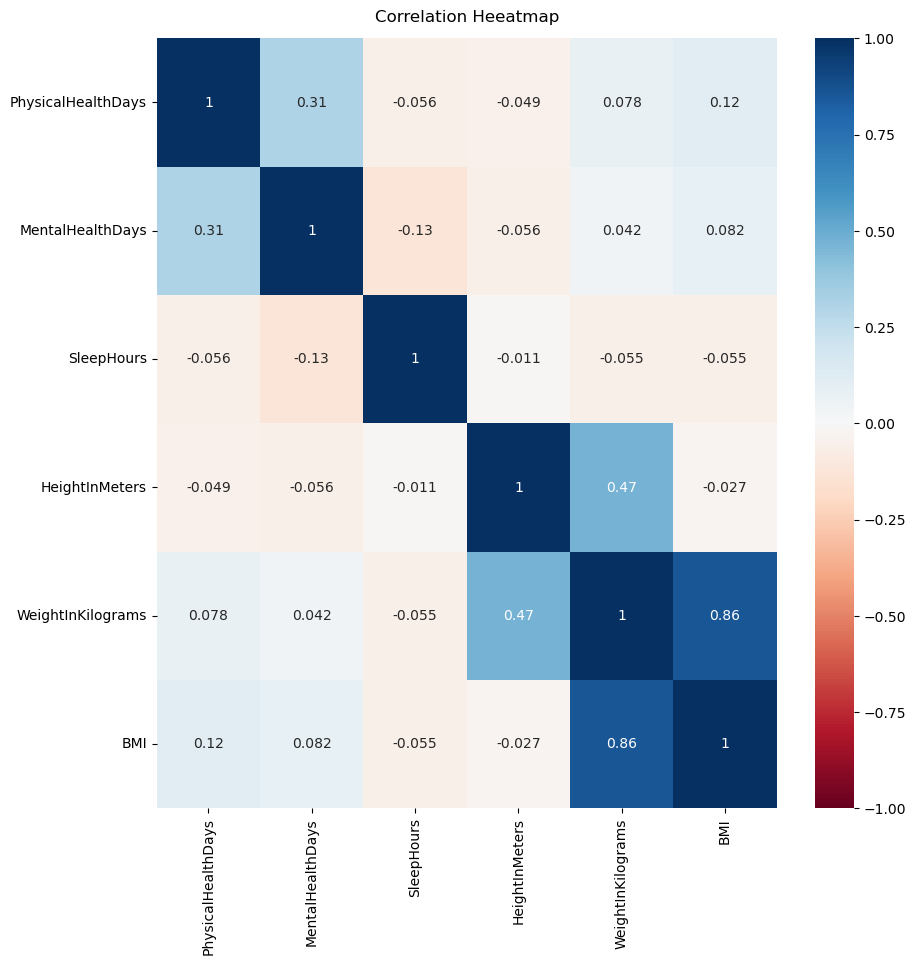

In [8]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), vmin = -1, vmax = 1, annot = True, ax = ax, cmap = 'RdBu')

#adding title to heatmap
corr.set_title('Correlation Heeatmap', fontdict = {'fontsize':12}, pad = 12)



## 3.BMI (Body Mass Index) is an important variable we could explore as a dependent variable.We can explore its relationship with several independent variables


### Weight in Kilograms: A 0.86 co-efficient indicates a strong positive correlation, which could mean the more the persons weight in kilograms the higher the BMI


### PhysicalHealthDays: A 0.12 co-efficient indicates a weak postive correlation
### MentalHealthDays: A 0.082 co-efficient indicates a very weak postive correlation
### SleepHours: A -0.055 co-efficient indicates a very weak negative correlation
### HeightInMeters: A -0.027 co-efficient indicates a very weak negative correlation

## 4. Create a scatterplot for BMI and Weight in Kilograms: which have a strong correlation

C:\Users\nikman\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


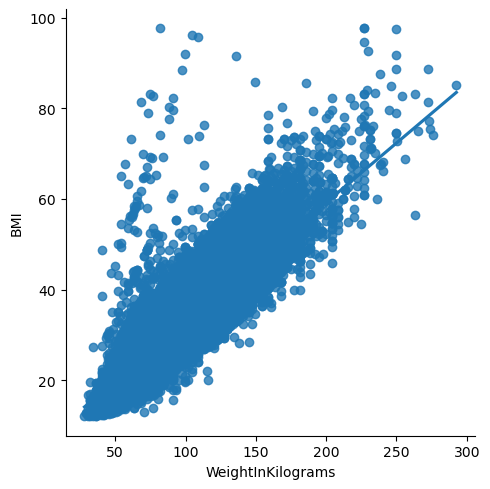

In [9]:
#Create a scatterplot for BMI and Weight in Kilograms in Seaborn
sns.lmplot(x = 'WeightInKilograms', y = 'BMI', data = df)

### 4. In the scatterplot there is a strong postive relationship between the two variables as the trend line runs steeply from left to right suggesting that as weight increases BMI tends to increase as well. There are many points far away from the line. This variability in data points and presence of outliers suggests that factors beyond weight alone contribute to variations in BMI. While weight is a significant determinant of BMI, it is not the sole factor influencing it.

## 5.Create a pair plot of the entire data set

C:\Users\nikman\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nikman\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nikman\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nikman\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

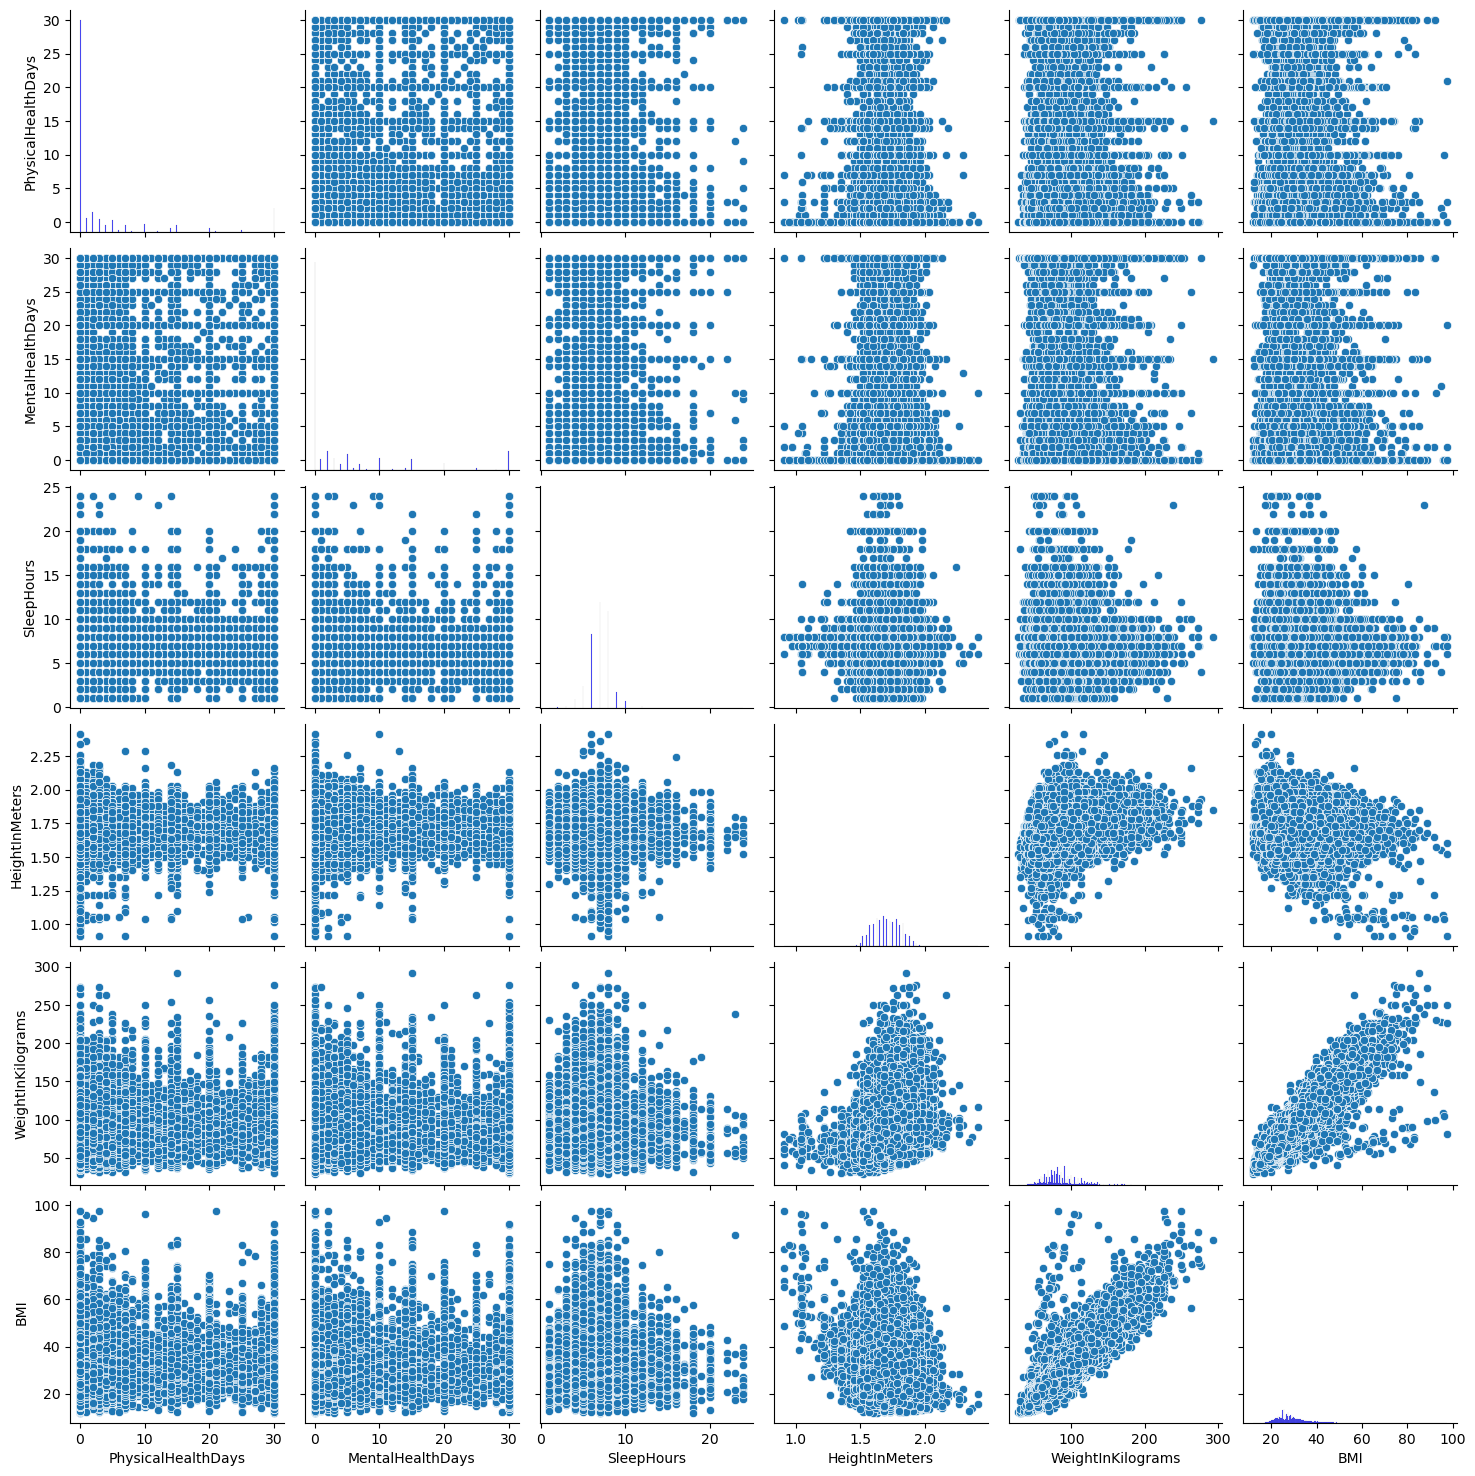

In [10]:
#creating a pair plot of df
g = sns.pairplot(df, diag_kws={'color': 'blue', 'alpha': 0.7})

### 5.The pair plot provides a comprehensive overview of the relationships between several numeric variables, including 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', and 'BMI'.
### When examining the numeric variables, 'PhysicalHealthDays', 'MentalHealthDays', and 'SleepHours' display considerable variability and dispersion. The data points are scattered widely across these plots, indicating diverse experiences across individuals in terms of physical and mental health days and sleep duration.
### WeightInKilograms shows a closer relationship with BMI versus HeightInMeters and BMI which is more dispersed. This suggests that weight has a stronger influence on BMI compared to height. However, it's worth noting that even in this case, some dispersion is still present, indicating that factors beyond weight alone contribute to variations in BMI.

## 6.Create a categorical plot and interpret the results.

C:\Users\nikman\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BMI', ylabel='Count'>

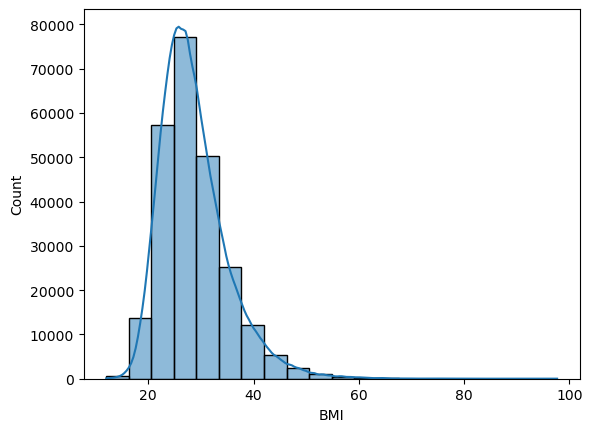

In [11]:
# creating histogram to visualize ditribution of BMI variable
sns.histplot(df['BMI'], bins = 20, kde = True)

### BMI ranges between 10 to 60 with the highest counts of BMI around 25 to 30 range.

### # Creating BMI categories

In [12]:
# Creating BMI categories
df.loc[df['BMI'] < 18.5, 'BMI Category'] = 'Underweight'

In [13]:
df.loc[(df['BMI'] >= 18.5) & (df['BMI'] <= 24.9), 'BMI Category'] = 'Normal Weight Range'

In [14]:
df.loc[(df['BMI'] >= 24.9) & (df['BMI'] < 30), 'BMI Category'] = 'Overweight'

In [15]:
df.loc[df['BMI'] >= 30, 'BMI Category'] = 'Obese'

In [16]:
# Checking output
df['BMI Category'].value_counts(dropna = False)

BMI Category
Overweight             89171
Obese                  84374
Normal Weight Range    68722
Underweight             3755
Name: count, dtype: int64

In [17]:
#checking the new column
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos', 'BMI Category'],
      dtype='object')

### Creating categorical plot in seaborn using BMI category

C:\Users\nikman\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nikman\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nikman\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\nikman\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


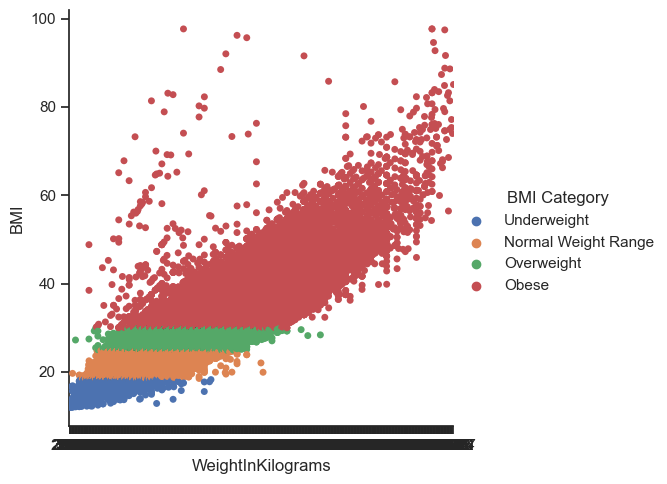

In [18]:
# Creating categorical plot
sns.set(style="ticks")
g = sns.catplot(x="WeightInKilograms", y="BMI", hue="BMI Category", data=df)

### 6.In this catplot we notice that as the WeightInKilograms increases the BMI also increases except for a some cases were the red dots on the top left have a high BMI eventhough the WeightInKilograms is low. We also see few green dots  on the lower left near the y axis where the BMI is in the overweight category but the WeightInKilograms is very low. This variability in data and possibility of outliers indicates that Weight is not the only factor that influences BMI there are other factors that add to this variability. Also we could consider the possibility of measurement bias in recording the BMI. Exploring additional factors or multiple independant variables together may give more insights

## 7.Research Question:

## I was able to see from this dataset that WeightInKilograms contributed the most to BMI. I was also able to see that PhysicalHealthDays, MentalHealthDays, SleepHours and HeightInMeters contributed the least to BMI. This touches on my final research question: How do different risk factors such as BMI,  PhysicalHealthDays, MentalHealthDays, SleepHours and HeightInMeters interact with each other in influencing the likelihood of heart disease? Are there any correlations or associations between various risk factors and the likelihood of heart disease?

## 8.Hypothesis

### Research Hypothesis:  If an individual's weight is high, then their BMI will also be high, suggesting a positive correlation between weight and BMI.
### Null Hypothesis:: If an individual has higher weight, then it does not necessarily lead to a high BMI, indicating no significant relationship between weight and BMI.
### Hypothesis: If weight is a contributing factor in BMI , then individuals with higher weights will exhibit higher BMI values compared to those with lower weights, supporting the notion that high weight contributes to higher BMI.

### Research Hypothesis: If a person has low Weight, then the person will also have low BMI, indicating an inverse relationship between weight and BMI.
### Null Hypothesis: If a person has lower Weight, then it does not necessarily lead to a low BMI, suggesting no significant inverse relationship between weight and BMI.
### Hypothesis: If weight is a contributing factor in BMI , then individuals with lower weights will exhibit lower BMI values compared to those with higher weights, supporting the notion that lowh weight contributes to higher BMI.¶